# Preprocessing Daily Dam Operation Data

### 1. Import Required Python Libraries

In [1]:
import pandas as pd
import datetime
from datetime import timedelta
from pylab import rcParams
import seaborn as sns
from matplotlib import pyplot as plt
import os
import warnings
warnings.filterwarnings("ignore")

### 2. Read Daily Dam Operation Data

<div class="alert alert-success">
Read Daily Dam Operation Data that obtained from DAON database system in K-water </div>

<div class="alert alert-success">
OBSYMD: 관측 년월일, IQTY: 유입량, TDQTY: 총방류량, RF: 강수량, EDQTY: 발전방류량, SPDQTY: 여수로방류량, ETCDQTY2: 기타방류량2 </div>

In [2]:
obs_folder_name = "YD_DAM_Upstream"
raw_data_folder = os.path.join(os.getcwd(), obs_folder_name, "raw_data")
os.listdir(raw_data_folder)

['YD_DAM_Upstream_WaterLevel_Daily.csv',
 '1_YD_DAM_Upstream_Rainfall_Observation_Periods.csv',
 'YD_DAM_Operation_Data_Daily.csv',
 '2_YD_DAM_Upstream_WaterLevel_Observation.xlsx',
 'YD_DAM_Upstream_WaterLevel_Hourly.csv',
 'YD_DAM_Upstream_Rainfall_Daily.csv',
 'YD_DAM_Operation_Data_Hourly.csv',
 'YD_DAM_Upstream_Rainfall_Hourly.csv']

In [3]:
all_obs_df = pd.read_csv(os.path.join(raw_data_folder, "YD_DAM_Operation_Data_Daily.csv"))
all_obs_df.head()

,OBSYMD,IQTY,TDQTY,RF,EDQTY,SPDQTY,ETCDQTY2
0,20010101,3.4,2.3,0.0,0.0,0.0,0.0
1,20010102,3.4,2.3,0.0,0.0,0.0,0.0
2,20010103,2.7,2.3,0.0,0.0,0.0,0.0
3,20010104,3.4,2.3,0.0,0.0,0.0,0.0
4,20010105,3.4,2.3,0.0,0.0,0.0,0.0


In [11]:
all_obs_df.tail()

,OBSYMD,IQTY,TDQTY,RF,EDQTY,SPDQTY,ETCDQTY2
8411,20240112,9.173,16.714,0.0000,8.724,0.0,0.0
8412,20240113,8.748,16.709,0.0000,8.722,0.0,0.0
8413,20240114,10.308,16.700,7.3083,8.726,0.0,0.0
8414,20240115,9.854,21.562,0.0000,9.825,0.0,0.0
8415,20240116,11.257,26.755,0.0000,10.947,0.0,0.0


##|# 3. Set Date Data Format and Observation Periods 

<div class="alert alert-success">
Change "date data format" from string to Pandas datetime format </div>

In [12]:
all_obs_df["date"] = pd.to_datetime(all_obs_df["OBSYMD"], format='%Y%m%d')
all_obs_df

,OBSYMD,IQTY,TDQTY,RF,EDQTY,SPDQTY,ETCDQTY2,date
0,20010101,3.400,2.300,0.0000,0.000,0.0,0.0,2001-01-01
1,20010102,3.400,2.300,0.0000,0.000,0.0,0.0,2001-01-02
2,20010103,2.700,2.300,0.0000,0.000,0.0,0.0,2001-01-03
3,20010104,3.400,2.300,0.0000,0.000,0.0,0.0,2001-01-04
4,20010105,3.400,2.300,0.0000,0.000,0.0,0.0,2001-01-05
...,...,...,...,...,...,...,...,...
8411,20240112,9.173,16.714,0.0000,8.724,0.0,0.0,2024-01-12
8412,20240113,8.748,16.709,0.0000,8.722,0.0,0.0,2024-01-13
8413,20240114,10.308,16.700,7.3083,8.726,0.0,0.0,2024-01-14
8414,20240115,9.854,21.562,0.0000,9.825,0.0,0.0,2024-01-15


<div class="alert alert-success">
Check Observation Periods to create Date Dataframe </div>

In [13]:
all_obs_df["date"].min(), all_obs_df["date"].max()

(Timestamp('2001-01-01 00:00:00'), Timestamp('2024-01-16 00:00:00'))

### 4. Preprocess Daily Dam Operation Data

<div class="alert alert-success">
<b> Select Required Time Periods </div>

In [14]:
all_obs_df = all_obs_df.set_index("date")
all_obs_df = all_obs_df.drop("OBSYMD", axis=1)

selected_op_df_f = all_obs_df.loc["2001-10-01":"2023-09-30"]
selected_op_df_f.head()

,IQTY,TDQTY,RF,EDQTY,SPDQTY,ETCDQTY2
date,,,,,,
2001-10-01,9.2,21.3,6.0,5.6,0.0,0.0
2001-10-02,5.9,21.3,0.1,2.8,0.0,0.0
2001-10-03,5.9,21.3,0.0,2.8,0.0,0.0
2001-10-04,7.7,21.3,2.3,2.8,0.0,0.0
2001-10-05,6.0,21.3,0.0,2.8,0.0,0.0


<div class="alert alert-success">
Check Missing Data </div>

In [15]:
print(len(selected_op_df_f[selected_op_df_f.isna().any(axis=1)]))

0


<div class="alert alert-success">
Plotting Missing data </div>

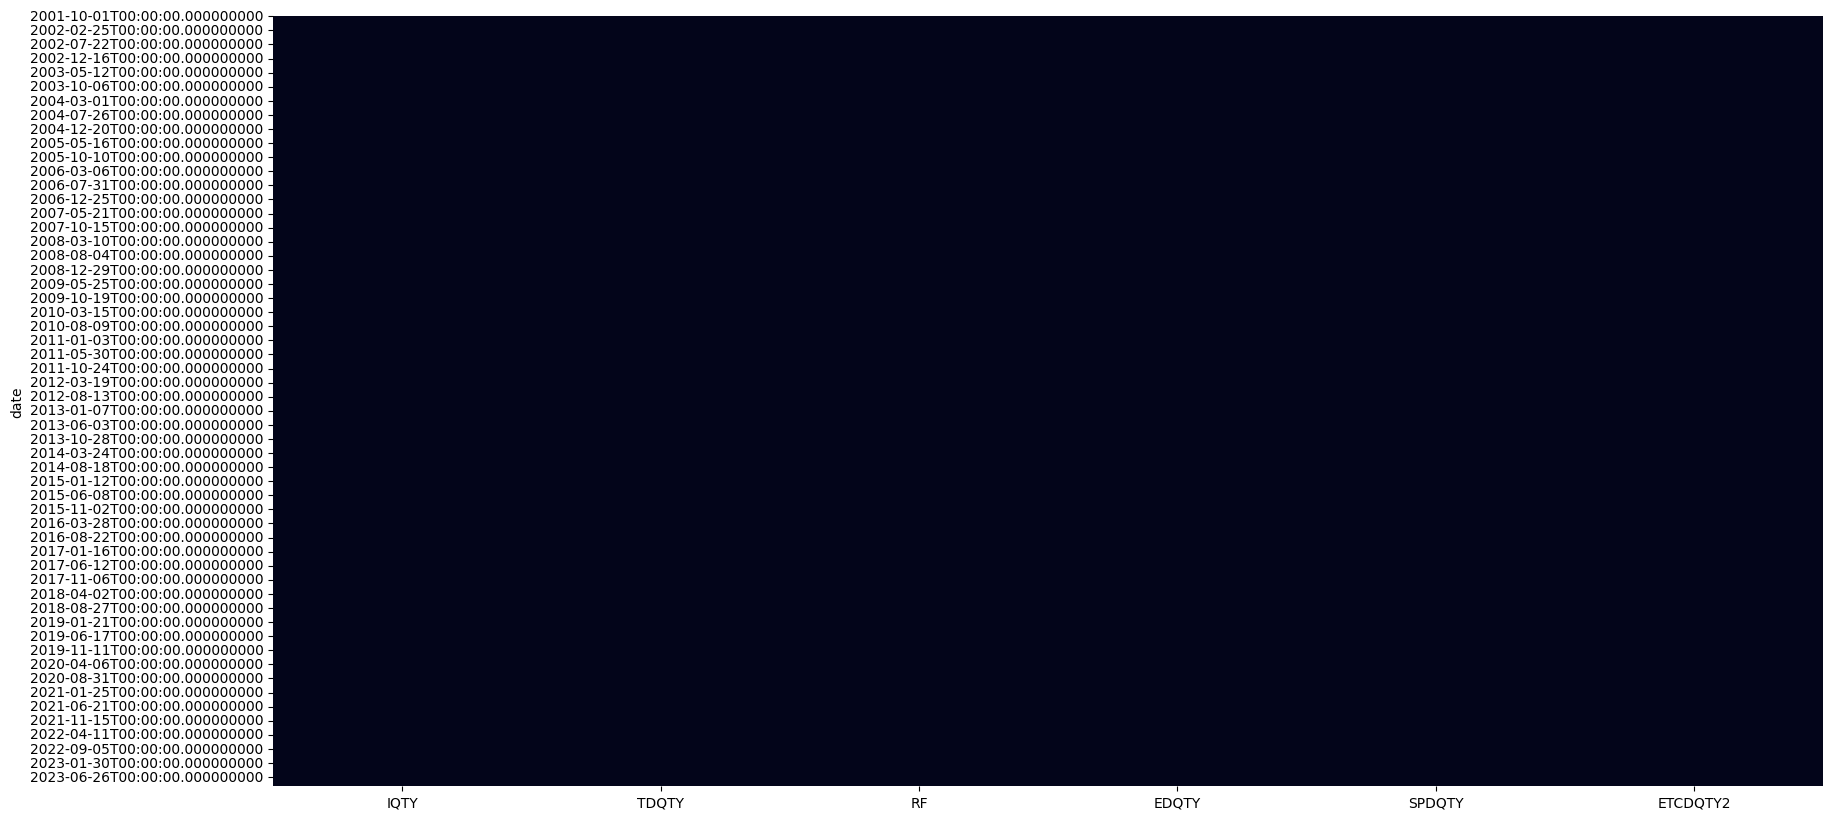

In [16]:
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(selected_op_df_f.isnull(), cbar=False)
plt.savefig(os.getcwd() + "/" + obs_folder_name + "/operation_dam_missing_daily.png", bbox_inches='tight')
plt.show()

### 5. Plot Daily Dam Operation Data

<div class="alert alert-success">
Plotting YD-Dam Daily Operation Data </div>

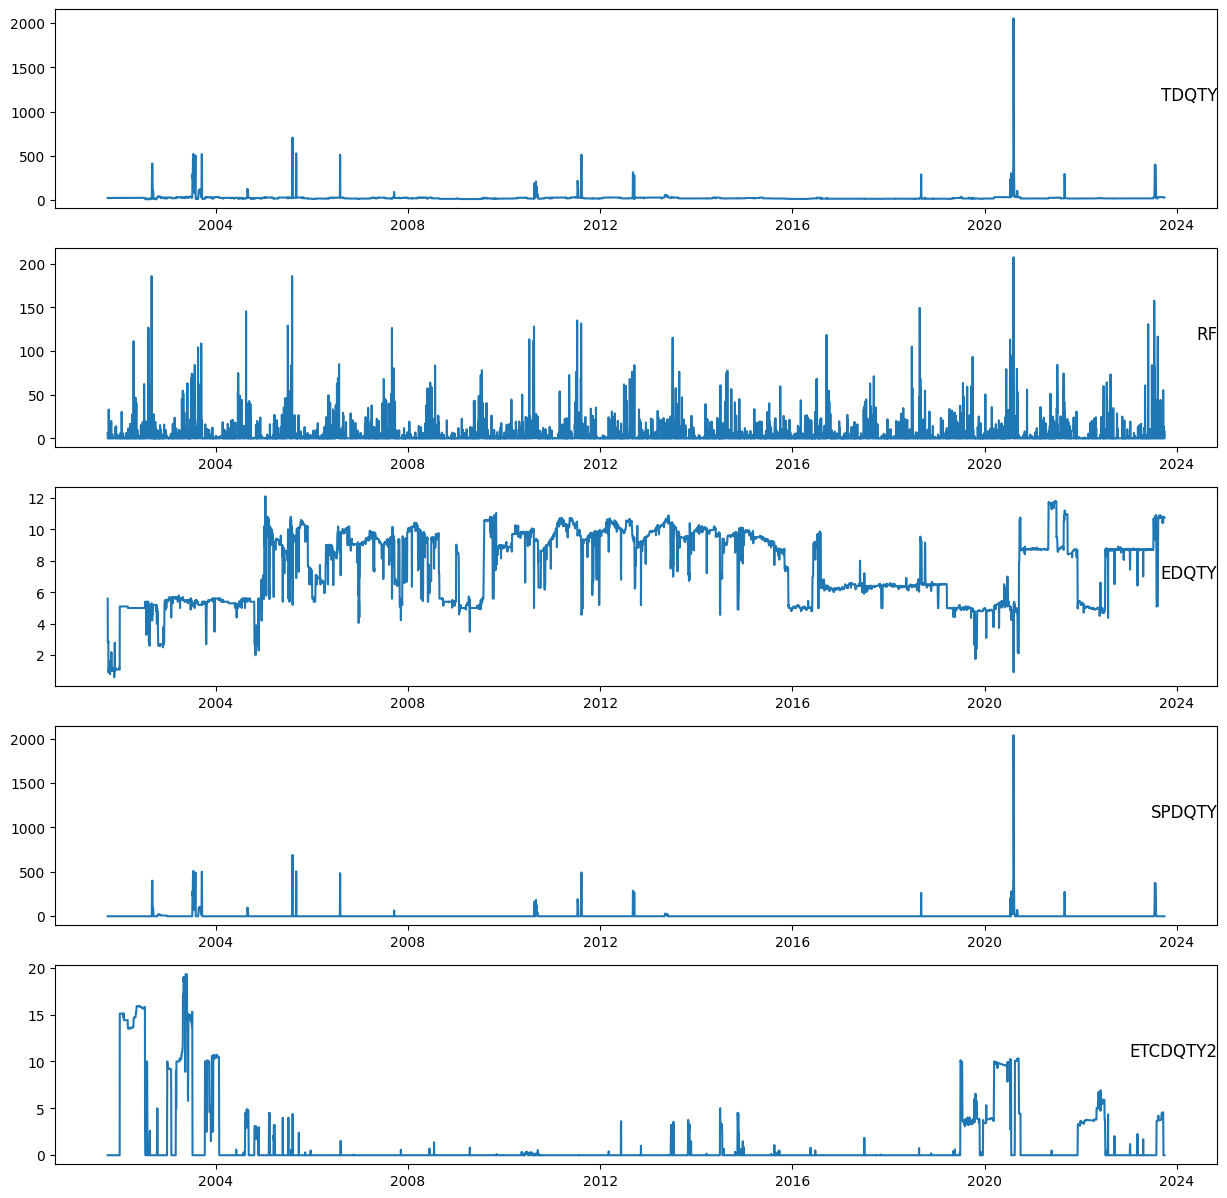

In [17]:
rcParams['figure.figsize'] = 15, 15
values = selected_op_df_f.values
groups = [*range(1,len(selected_op_df_f.columns), 1)]
i = 1
# plot each column
for group in groups:
    plt.subplot(len(groups), 1, i)
    plt.plot(selected_op_df_f.index,  values[:, group])
    plt.title(selected_op_df_f.columns[group], y=0.5, loc='right')
    i += 1

plt.savefig(os.getcwd() + "/" + obs_folder_name + "/operation_dam_ts_daily.png", bbox_inches='tight')
plt.show()

### 6. Save Daily Dam Operation Data as CSV format

In [18]:
selected_op_df_f.to_csv(os.getcwd() + "/" + obs_folder_name + "/YD_Dam_Operation_Daily_f.csv")

### 7. Creating Model Input using observation data